In [1]:
#RL avec plusieurs parametres
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:
# Télécharger les données de prix d'actions
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2022-01-01')

# Calculer les indicateurs de marché
data['Volatility'] = data['Close'].rolling(window=21).std()
data['Volume'] = data['Volume']
data['Momentum'] = data['Close'].diff(5)
data['Future_Return'] = data['Close'].shift(-5) / data['Close'] - 1

# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()

# Diviser les données en features (X) et target (y)
X = data[['Volatility', 'Volume', 'Momentum']].values #p=3 donc X est de shape nx3
y = data['Future_Return'].values
print(X)
print(X.shape)
print(y)
print(y.shape)
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[*********************100%%**********************]  1 of 1 completed

[[ 2.43711474e-01  6.98342400e+08 -3.60000134e-01]
 [ 2.42005569e-01  6.15328000e+08 -3.08928967e-01]
 [ 2.53961350e-01  7.57652000e+08 -2.58570671e-01]
 ...
 [ 6.73869722e+00  9.11859000e+07 -1.33999634e+00]
 [ 6.68387379e+00  9.21353000e+07 -3.66000366e+00]
 [ 6.60662033e+00  6.83566000e+07  4.02000427e+00]]
(2996, 3)
[ 0.00168492 -0.02062943  0.03447007 ...  0.03693855  0.01457525
  0.00731795]
(2996,)


In [5]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0014987347701795669
R^2 Score: -0.0048327413683133535


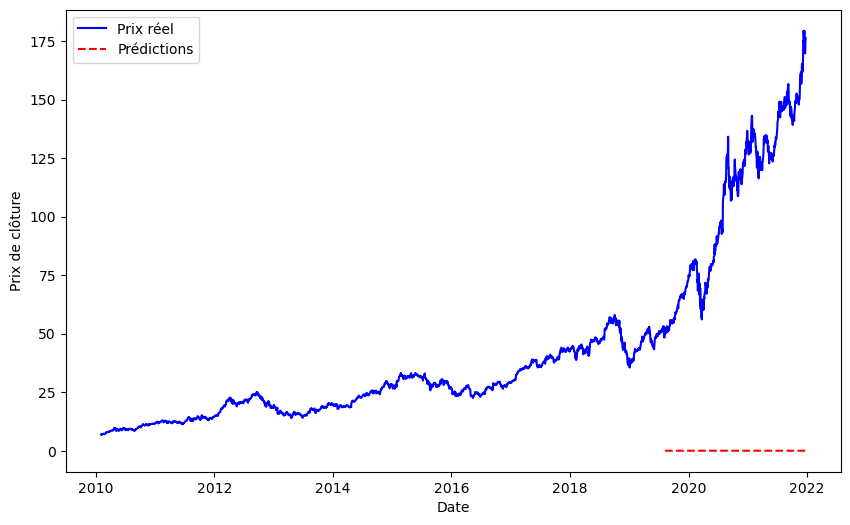